In [25]:
import pandas as pd

In [26]:
df = pd.read_csv('datasets/train.mnist.csv')

In [27]:
df.shape

(42000, 785)

In [28]:
df.sample()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
37026      7       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
37026       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
37026         0         0         0         0         0  

[1 rows x 785 columns]

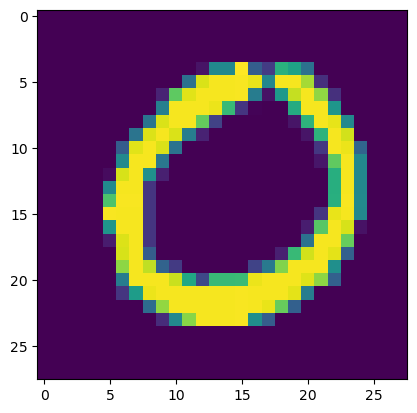

In [29]:
import matplotlib.pyplot as plt 
plt.imshow(df.iloc[19512, 1:].values.reshape(28, 28))

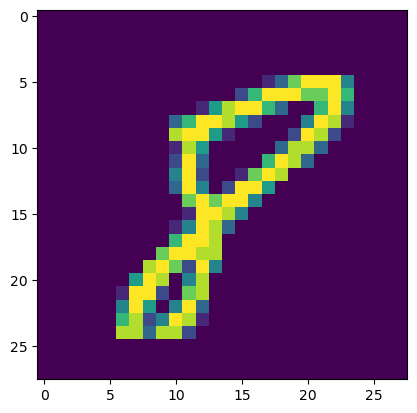

In [30]:
plt.imshow(df.iloc[18306, 1:].values.reshape(28, 28))

In [31]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
X_train.shape

(33600, 784)

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
knn = KNeighborsClassifier()

In [36]:
knn.fit(X_train,y_train)    

KNeighborsClassifier()

In [37]:
import time
start = time.time()
y_pred=knn.predict(X_test)
print(time.time()-start)

14.634435653686523


In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9648809523809524

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [40]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Principle components = number of features we want

In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100)

In [24]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [43]:
knn = KNeighborsClassifier()

In [44]:
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [46]:
import time
start = time.time()
y_pred=knn.predict(X_test_trf)
print(time.time()-start)

0.6138980388641357


In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9544047619047619

In [ ]:
for i in range(1, 10): # DO 1 to 785
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)
    knn = KNeighborsClassifier()
    knn.fit(X_train_trf,y_train)
    y_pred=knn.predict(X_test_trf)
    print(i, accuracy_score(y_test, y_pred))

1 0.2580952380952381
2 0.3236904761904762
3 0.5104761904761905
4 0.6663095238095238
5 0.7378571428571429
6 0.8227380952380953
7 0.8436904761904762
8 0.8721428571428571
9 0.886547619047619


In [62]:
# to visualize the data
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf= pca.transform(X_test)

In [63]:
X_train_trf

array([[-2.71863253, -0.48982409],
       [-0.67698015, -6.75362491],
       [-3.03323281,  6.50981624],
       ...,
       [ 2.14883643,  0.78079444],
       [ 1.05957006,  0.94767312],
       [17.70258446,  1.96188185]])

In [69]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0], y=X_train_trf[:,1], color=y_train_trf, color_discrete_sequence=px.colors.qualitative.Light24)
fig.show()

In [66]:
# 3d transformation
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf= pca.transform(X_test)

In [68]:
X_train_trf.shape

(33600, 3)

In [ ]:
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(x=X_train_trf[:,0], y=X_train_trf[:,1], z=X_train_trf[:,2], color=y_train_trf, color_discrete_sequence=px.colors.qualitative.Light24)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [ ]:
pca.explained_variance_
# here we can see that the first 3 components cover 40%, 29% and 26% of the variance of the data ie more than 95%

array([40.67111198, 29.17023401, 26.74459621])

In [ ]:
pca.explained_variance_ratio_

array([0.05785192, 0.0414927 , 0.03804239])

In [76]:
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf= pca.transform(X_test)

In [77]:
pca.explained_variance_.shape

(784,)

In [78]:
pca.components_.shape

(784, 784)

In [80]:
import numpy as np
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

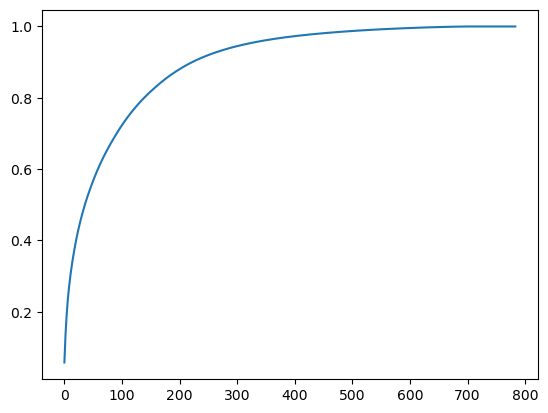

In [81]:
# plot the explained variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [ ]:
# At n_components = almost 300, we have more than 95% of the variance of the data